In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.parser import parse

In [18]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse
from pprint import pprint
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [12]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Find the most recent date in the data set.
for recent_date in session.query(Measurement.date).order_by(Measurement.date.desc()).first():
    dt = parse(recent_date)
    # datetime.datetime(2017, 8, 23, 0, 0)
print(dt.strftime('%Y/%m/%d'))
# 2017/08/23

2017/08/23


In [15]:
# Calculate the date one year from the last date in data set.
a_date = datetime(2017, 8, 23)
days = timedelta(365)

last_year_date = a_date - days
#Subtract 365 days from a_date

print(last_year_date.strftime('%Y/%m/%d'))


2016/08/23


In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



In [21]:
# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-22')\
    .filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()

pprint(prcp)

[('2016-08-23', 0.0),
 ('2016-08-23', 3.8),
 ('2016-08-23', 1.3),
 ('2016-08-23', None),
 ('2016-08-23', 0.5),
 ('2016-08-23', 45.5),
 ('2016-08-23', 17.8),
 ('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9

In [25]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp, columns = ["Date", "Precipitaion"])

prcp_df.set_index("Date", inplace=True)

prcp_df

,Precipitaion
Date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,0.0


In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df["Precipitaion"].describe()

count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: Precipitaion, dtype: float64

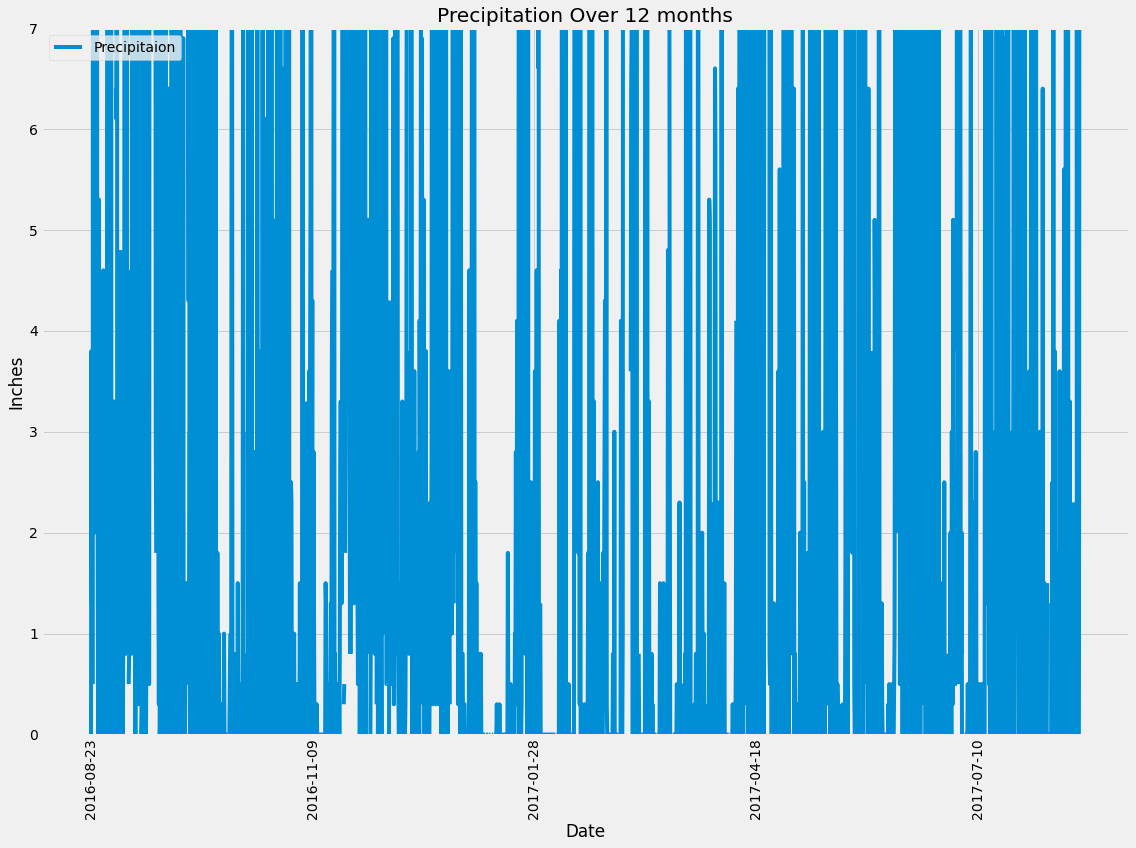

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = prcp_df.plot(figsize=(16,12), ylim=(0,7), title = "Precipitation Over 12 months", rot=90)
prcp_plot.set_ylabel("Inches")
prcp_plot.set_xlabel("Date")
plt.tight_layout()
plt.show()

# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).group_by(Station.station).count()

9

In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [58]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.station == "USC00519281").all()

most_active_station

[('USC00519281', 25.0),
 ('USC00519281', 26.7),
 ('USC00519281', 26.7),
 ('USC00519281', 23.9),
 ('USC00519281', 22.8),
 ('USC00519281', 25.6),
 ('USC00519281', 25.0),
 ('USC00519281', 25.6),
 ('USC00519281', 26.7),
 ('USC00519281', 26.7),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 22.8),
 ('USC00519281', 23.3),
 ('USC00519281', 26.7),
 ('USC00519281', 26.1),
 ('USC00519281', 25.0),
 ('USC00519281', 26.7),
 ('USC00519281', 24.4),
 ('USC00519281', 26.1),
 ('USC00519281', 23.9),
 ('USC00519281', 26.1),
 ('USC00519281', 25.6),
 ('USC00519281', 26.1),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 24.4),
 ('USC00519281', 23.3),
 ('USC00519281', 25.0),
 ('USC00519281', 25.6),
 ('USC00519281', 26.1),
 ('USC00519281', 26.1),
 ('USC00519281', 25.0),
 ('USC00519281', 26.7),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 25.0),
 ('USC00519281', 26.1),
 ('USC00519281', 26.1),
 ('USC00519281',

In [60]:
#Create a dataframe to plot the histogram
most_active_station_df = pd.DataFrame(most_active_station)
most_active_station_df

,station,tobs
0,USC00519281,25.0
1,USC00519281,26.7
2,USC00519281,26.7
3,USC00519281,23.9
4,USC00519281,22.8
...,...,...
346,USC00519281,25.0
347,USC00519281,25.0
348,USC00519281,24.4
349,USC00519281,24.4


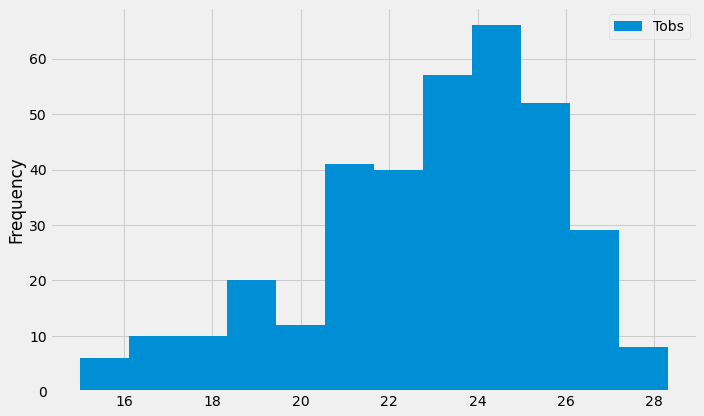

In [62]:
#Create the histogram
plt.figure(figsize=(10,6))
plt.hist(most_active_station_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.legend(["Tobs"])
plt.tight_layout()
plt.show()

# Close session

In [63]:
# Close Session
session.close()